In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
%matplotlib inline

In [2]:
# Now, getting the file

file = "C:\\Users\\vinay\\Downloads\\Mall_Customers.csv"
df = pd.read_csv(file)
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
income_df = df["Annual Income (k$)"]
score_df = df["Spending Score (1-100)"]

Text(0, 0.5, 'Spending Score')

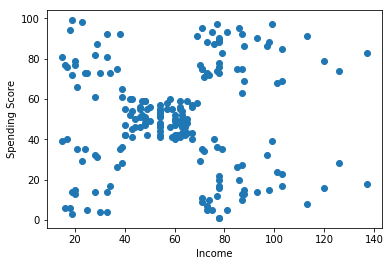

In [4]:
# the 2 main feature are income & Spending Score
plt.scatter(income_df, score_df)
plt.xlabel("Income")
plt.ylabel("Spending Score")

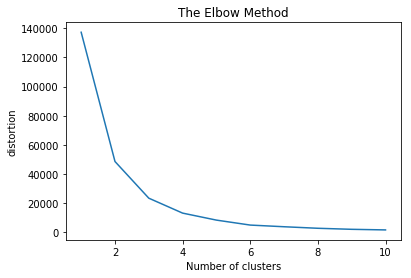

In [5]:
# Now, Applying the elbow funtion to find the better K

distortion = []
a = np.array(income_df)
b = np.array(score_df)

income = a.reshape(-1,1)
score = b.reshape(-1,1)

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(income,score)
    distortion.append(kmeans.inertia_) # Inertia: Sum of distances of samples to their closest cluster center

plt.plot(range(1, 11), distortion)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('distortion')
plt.show()

In [6]:
# Trying to auto detect the elbow from elbow Method

# def auto_elbow_cluster(elbow_lst):
#     no_of_cluster = []
#     for i in range(len(elbow_lst)-2):
#         diff = elbow_lst[-(i+2)]- elbow_lst[-(i+1)]
#         print("{} diff --> ".format(i), diff ,"{} twice --> ".format(i), 2*diff )
        
#         if(elbow_lst[-(i+2)] < 2*diff):
#             print(i)
#             print("no of cluster --> ", int(i/2))
#             no_of_cluster.append(int(i/2))
            
#     print("lst -->",no_of_cluster)

# #     return no_of_cluster[0]

# a = auto_elbow_cluster(distortion)
# print(a)
# print(len(distortion))
# print(distortion)

In [24]:
# Now, we have 5 as K value 
Kmean = KMeans(n_clusters= 5 ,init= 'k-means++', random_state=42)
y_kmeans = Kmean.fit_predict(income, score)
print(y_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


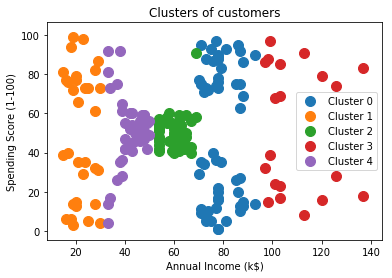

In [25]:
def kmean_graph(unique_lst):
    for i in range(len(unique_lst)):
        plt.scatter(income[y_kmeans == unique_lst[i]], score[y_kmeans == unique_lst[i]], s = 100,label = 'Cluster {}'.format(i))
    
    plt.title('Clusters of customers')
    plt.xlabel('Annual Income (k$)')
    plt.ylabel('Spending Score (1-100)')
    plt.legend()
    plt.show()
    
kmean_graph(np.unique(y_kmeans))